# What is NER?

[Named Entity Recognition](https://en.wikipedia.org/wiki/Named-entity_recognition) (NER) is a field of Natural Language Processing (NLP) to preprocess the texts and information.

## Introduction to spaCy and NER Tags

[spaCy](https://spacy.io/usage/spacy-101) is a free, open-source library for advanced NLP in Python. It helps you process and understand large volumes of text. spaCy has many [linguisitc features](https://spacy.io/usage/linguistic-features#named-entities) to process raw text, including POS tagging, tokenization, parsing, etc. NER is one of them.

spaCy comes with an extremely fast statistical entity recognition system that assigns labels to contiguous spans of tokens.


---
spaCy uses tags to categorize words and phrases into different types. Tags are accessible through the .label_ property of an entity. Here's the full lists for reference.

Tags are accessible through the `.label_` property of an entity.
<table>
<tr><th>TYPE</th><th>DESCRIPTION</th><th>EXAMPLE</th></tr>
<tr><td>`PERSON`</td><td>People, including fictional.</td><td>*Fred Flintstone*</td></tr>
<tr><td>`NORP`</td><td>Nationalities or religious or political groups.</td><td>*The Republican Party*</td></tr>
<tr><td>`FAC`</td><td>Buildings, airports, highways, bridges, etc.</td><td>*Logan International Airport, The Golden Gate*</td></tr>
<tr><td>`ORG`</td><td>Companies, agencies, institutions, etc.</td><td>*Microsoft, FBI, MIT*</td></tr>
<tr><td>`GPE`</td><td>Countries, cities, states.</td><td>*France, UAR, Chicago, Idaho*</td></tr>
<tr><td>`LOC`</td><td>Non-GPE locations, mountain ranges, bodies of water.</td><td>*Europe, Nile River, Midwest*</td></tr>
<tr><td>`PRODUCT`</td><td>Objects, vehicles, foods, etc. (Not services.)</td><td>*Formula 1*</td></tr>
<tr><td>`EVENT`</td><td>Named hurricanes, battles, wars, sports events, etc.</td><td>*Olympic Games*</td></tr>
<tr><td>`WORK_OF_ART`</td><td>Titles of books, songs, etc.</td><td>*The Mona Lisa*</td></tr>
<tr><td>`LAW`</td><td>Named documents made into laws.</td><td>*Roe v. Wade*</td></tr>
<tr><td>`LANGUAGE`</td><td>Any named language.</td><td>*English*</td></tr>
<tr><td>`DATE`</td><td>Absolute or relative dates or periods.</td><td>*20 July 1969*</td></tr>
<tr><td>`TIME`</td><td>Times smaller than a day.</td><td>*Four hours*</td></tr>
<tr><td>`PERCENT`</td><td>Percentage, including "%".</td><td>*Eighty percent*</td></tr>
<tr><td>`MONEY`</td><td>Monetary values, including unit.</td><td>*Twenty Cents*</td></tr>
<tr><td>`QUANTITY`</td><td>Measurements, as of weight or distance.</td><td>*Several kilometers, 55kg*</td></tr>
<tr><td>`ORDINAL`</td><td>"first", "second", etc.</td><td>*9th, Ninth*</td></tr>
<tr><td>`CARDINAL`</td><td>Numerals that do not fall under another type.</td><td>*2, Two, Fifty-two*</td></tr>
</table>


If you are not sure what does a specific type of lable means, you can run the code below to check its meaning.

In [ ]:
import spacy # imports the spacy module

label = "GPE" # assigns the string 'GPE' to the variable label
spacy.explain(label) # calls the function spacy.explain() with the argument label

'Countries, cities, states'



---



## How does it work?

NER works by locating and identifying the named entities present in unstructured text into the standard categories such as person names, locations, organizations, time expressions, quantities, monetary values, percentage, codes etc.


Intuitevly, you may think of NER as a way for computers to “read” a text and pick out important names and terms, similar to how you might highlight key points when you’re reading a document. You may magine this process as you’re reading a newspaper article. As you read, you notice certain words and phrases that stand out because they contains more information, such as names of people, places, organizations, or specific dates. For example, if you read, “Jane Doe from Google visited Paris in June,” you recognize that “Jane Doe” is a person, “Google” is a company, “Paris” is a city, and “June” is a month.

NER is like teaching a computer to do the same thing. You give it a piece of text, and it highlights these important names and terms. As computer doesn't understand human language, we need to conduct NLP pipelines to make the text understandable for it. NER is just one of the tasks in doing this in the big family of NLP pipeline.



At its core, NLP pipeline for NER tasks is just a two-step process, which are:

1. Detect the entities from texts.
2. Classify them into different categories as needed.

# Setup

This tutorial covers two models from spaCy: one is `'en_core_web_sm'` and the other one is `'spaCy-lmm NER'`.


*   `'en_core_web_sm'` is a simple to used spaCy pretrained model.
*   `'spaCy-lmm NER'` is a new model integrating Large Language Models (LLMs) in spaCy, which is meant to be used for a more complex task.

In [ ]:
# Install packages that we need first
%%capture

! pip install spacy
! python -m pip install spacy-llm
! pip install pandas

# Default method: spaCy model

Spacy has the `‘ner’` pipeline component that identifies token spans fitting a predetermined set of named entities. These are available as the `‘ents’` property of a Doc object.

In this section, we use the pretrained spaCy NER model, **'[en_core_web_sm](https://spacy.io/models/en/#en_core_web_sm)'**.

`'en_core_web_sm'` is a small English pipeline trained on written web text (blogs, news, comments), that includes vocabulary, syntax and entities.

In [ ]:
# import the displaCy library
import spacy
from spacy import displacy

# load the model from spaCy
nlp = spacy.load("en_core_web_sm")

You could input any texts to perform the entity recognition task. In this example, we use the sentence "Joe Biden travelled to the White House" for demonestration. You may replace it with any texts you want.

## Display Entities

In [ ]:
# Visualize the entity recognition
text = "President Joe Biden announced to the nation on Sunday that he is standing down from running in the 2024 presidential race. The news comes as several top Democratic voices called for him to step aside from his bid for reelection after a shaky debate performance against former President Donald Trump in June."

doc = nlp(text)

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)



The above output displays the names of the entities, including their start and end positions in the text, and the corresponding predicted labels. You could make a dataframe to show the labels and the corresponding texts clearly.

In [ ]:
import pandas as pd

entities = [(ent.text, ent.label_, ent.lemma_) for ent in doc.ents]
df = pd.DataFrame(entities, columns=['text', 'type', 'lemma'])
print(df)

If you are performing the NER task for a long paragraph, you may want to visualize the lables line by line. Thus, instead of running the above code, you could try this one:

In [ ]:
# Visualize the name entities line by line.
text = u'Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million.'u'By contrast, Sony sold only 7. 'u'Apple’s Services set a record for the quarter and saw a jump in revenue YoY of 14 percent, while Mac sales increased about 4 percent.'

doc = nlp(text)

for sent in doc.sents:
  displacy.render(nlp(sent.text), style="ent", jupyter=True)

## Entity Vsualization

In [ ]:
displacy.render(doc, style="ent", jupyter=True)

# LLMs method: spaCy-llm NER

If you are dealing with more complex cases, you could use an LLMs based model to detect the entities.

MIT has developed [spacy-llm package](https://github.com/explosion/spacy-llm) to integrate Large Language Models (LLMs) into spaCy, in order to feature natural language's understanding capabilities.

Here is a brief summary of steps that we will do in the following code:

1. Setup API key
2. Create Configuration File
3. Create Example Data
4. Create Pipeline Script
5. Run Pipeline Script


In [ ]:
!pip install openai
!python -m pip install "spacy-llm[transformers]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.3/361.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of xformers to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of xformers to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.8 MB/s

###  1. Setup API Key

[Application programming interface key](https://en.wikipedia.org/wiki/API_key) (API), is a unique code that identifies and authenticates an application or user.
In this tutorial, we will use OpenAI API key, which is necessary to proceed our LLM NER model below. You can create your OpenAI API key and organization in your [OpenAI account platform](https://platform.openai.com/docs/quickstart). Then, you can copy and paste them in the quote below.

In [ ]:
from google.colab import userdata


In [ ]:
import os
import openai

# Set your OpenAI API key and organization
# os.environ["OPENAI_API_KEY"] = "<YOUR_OPENAI_API_KEY>"

os.environ["OPENAI_API_KEY"] = userdata.get('openai_api_key')


**Warning!** All API usage is subject to rate limits. The OpenAI API has separate limits for requests per minute and tokens per minute. If you tried too many times using your OpenAI API key within a short time, your code might be running very slowly. You may receive the following report:
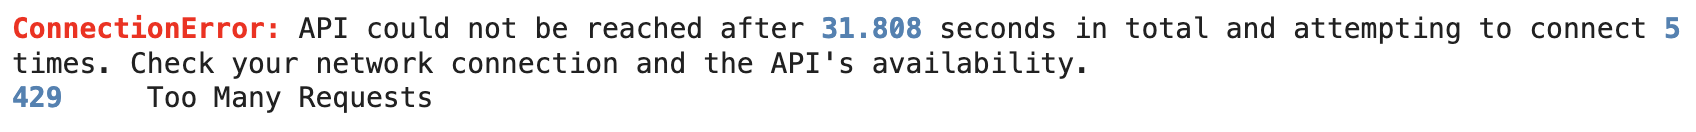 So be sure to run the code wisely, or refer to [this](https://cookbook.openai.com/examples/how_to_handle_rate_limits) OpenAI webpage for possible soulutions.

###  2. Create Configuration File

Configuration files are used to configure the parameters and initial settings of computer programs. Here, we will create a configuration file that spaCy will use to set up the NER pipeline. Specifically:

*   The `[paths]` section specifies where the examples file is located.
*   The `[nlp]` section defines the language and the pipeline components.
*   The `[components.llm]` section configures the LLM component.
*   The `[components.llm.task]` section defines the NER task, including the labels (eg., PERSON, ORG, DATE) and their definitions.
*   The `[components.llm.task.examples]` section specifies the path to the examples file.
*   The `[components.llm.model]` section specifies the model to use (eg., GPT-3.5).

Refer to [here](https://github.com/explosion/spacy-llm/blob/main/usage_examples/ner_v3_openai/fewshot.cfg) for further information.



 *Note that the code inside the triple quotes (""" """) is a way to define a multi-line string in Python. This string is not executed by itself but can be written to a file or used in other ways within the script. When you see a block of code inside triple quotes, it is typically meant to be stored as a string variable and then used for further processing, such as writing it to a file.In this specific case, the pipeline_script variable holds the entire Python script as a multi-line string. The subsequent code writes this string to a file named run_pipeline.py, making it an executable script.* You want to not modify this format.

In [ ]:
config_content = """
[paths]
examples = "example.json"

[nlp]
lang = "en"
pipeline = ["llm"]

[components]

[components.llm]
factory = "llm"

[components.llm.task]
@llm_tasks = "spacy.NER.v3"
labels = ["Author", "Character", "Work"]
description = "Entities are names of authors, works such as novels, and fictional characters. Every time an author, work, or character is mentioned, that is an entity. Adjectives, verbs, adverbs are not entities. Pronouns are not entities."

[components.llm.task.label_definitions]
Author = "Extract all names of authors by full name or last name, e.g. James Baldwin or Baldwin"
Character = "Extract all names of fictional characters whether full name, first name, or last name, e.g. Viktor Frankenstein, Frankenstein, Viktor, Gatsby"
Work = "Extract all names of artistic works, such as a novel, e.g., Beloved, The Great Gatsby"

[components.llm.task.examples]
@misc = "spacy.FewShotReader.v1"
path = "example.json"

[components.llm.model]
@llm_models = "spacy.GPT-4.v2"
"""

# Write the updated configuration to a config file
with open("config.cfg", "w") as file:
    file.write(config_content)


We save it to the file called `"config.cfg"`. You can get access to this file by clickling on the file icon on the left. Note that we define three labels, `'PERSON'`, `'ORG'`, `'DATE'`, in this example. You may define other labels specific to your tasks.

### 3. Create Example Data

[JavaScript Object Notation](https://en.wikipedia.org/wiki/JSON) (JSON) is an open standard file format for communicating data between browsers and servers, as a text-based format derived from JavaScript. JSON is a plain text written in JavaScript object notation and easy for humans to read and write.

In our JSON file, we define a text example and annotations for entities (PERSON, DATE). Each entry in spans includes the text of the entity, whether it is an entity, its label, and the reason.

We use the following sentences as the example for the purpose of demonstration:

> "President Joe Biden announced to the nation on Sunday that he is standing down from running in the 2024 presidential race. The news comes as several top Democratic voices called for him to step aside from his bid for reelection after a shaky debate performance against former President Donald Trump in June.":



In [ ]:
import json

expanded_example_content = [
    {
        "text": """
        — pride and prejudice by jane austen stands as a pinnacle of english literature.
        elizabeth is such a strong fmc. opposite elizabeth bennet stands the brooding and enigmatic mr. darcy, a wealthy and reserved gentleman.
        """,
        "spans": [
            {"text": "pride and prejudice", "is_entity": True, "label": "Work", "reason": "Name of a novel"},
            {"text": "jane austen", "is_entity": True, "label": "Author", "reason": "Name of author"},
            {"text": "mr. darcy", "is_entity": True, "label": "Character", "reason": "Name of character"},
            {"text": "elizabeth", "is_entity": True, "label": "Character", "reason": "Name of character"},
            {"text": "elizabeth bennet", "is_entity": True, "label": "Character", "reason": "Name of character"},
        ]
    },
    # New examples with variations
    {
        "text": """
        Fitzgerald's The Great Gatsby explores the life of Jay Gatsby. Gatsby is deeply in love with Daisy Buchanan,
        but Nick, the narrator, remains a mystery.
        """,
        "spans": [
            {"text": "Fitzgerald", "is_entity": True, "label": "Author", "reason": "Name of author"},
            {"text": "The Great Gatsby", "is_entity": True, "label": "Work", "reason": "Name of novel"},
            {"text": "Jay Gatsby", "is_entity": True, "label": "Character", "reason": "Name of character"},
            {"text": "Gatsby", "is_entity": True, "label": "Character", "reason": "Nickname of character"},
            {"text": "Daisy Buchanan", "is_entity": True, "label": "Character", "reason": "Name of character"},
            {"text": "Nick", "is_entity": True, "label": "Character", "reason": "Name of character"},
        ]
    },
    {
        "text": """
        In Mary Shelley's Frankenstein, Victor Frankenstein creates a monster. Frankenstein and the monster engage
        in a battle of wits throughout the novel.
        """,
        "spans": [
            {"text": "Mary Shelley", "is_entity": True, "label": "Author", "reason": "Name of author"},
            {"text": "Frankenstein", "is_entity": True, "label": "Work", "reason": "Name of novel"},
            {"text": "Victor Frankenstein", "is_entity": True, "label": "Character", "reason": "Name of character"},
            {"text": "Frankenstein", "is_entity": True, "label": "Character", "reason": "Nickname of character"},
        ]
    },
    {
        "text": """
        The tale of Sherlock Holmes, written by Arthur Conan Doyle, is legendary. Holmes and Dr. Watson solve
        crimes together.
        """,
        "spans": [
            {"text": "Sherlock Holmes", "is_entity": True, "label": "Character", "reason": "Name of character"},
            {"text": "Arthur Conan Doyle", "is_entity": True, "label": "Author", "reason": "Name of author"},
            {"text": "Holmes", "is_entity": True, "label": "Character", "reason": "Nickname of character"},
            {"text": "Dr. Watson", "is_entity": True, "label": "Character", "reason": "Name of character"},
        ]
    }
]

# Write the expanded examples to a JSON file
with open("example.json", "w") as file:
    json.dump(expanded_example_content, file)


Again, we save this entity definitions to a file called `"Bidenexample.json"`. These saved files will be used in our future code.

### 4. Create Pipeline Script

A **pipeline script** is a piece of code that defines and executes a series of steps or stages (a pipeline) to process data.

We will create a script that sets up and runs the NER pipeline using the configuration and example data. Refer to [here](https://github.com/explosion/spacy-llm/blob/main/usage_examples/ner_v3_openai/run_pipeline.py) for further information.

Here's a breakdown of the steps that what a script does:

1.	Load a configuration file.
2.	Assemble the NLP pipeline based on the configuration.
3.	Process a given text.
4.	Output the recognized entities.

In our script below, here are some highlights:
*   The script loads the configuration and example data, sets up the NER pipeline, and processes the input text to identify entities.
*   The `assemble` function from `spacy_llm.util` is used to create the pipeline.
*   The `run_pipeline` function takes the text to analyze, the configuration file path, and the examples file path as arguments.

In [ ]:
pipeline_script = """
from pathlib import Path
import typer
from wasabi import msg
from spacy_llm.util import assemble

Arg = typer.Argument
Opt = typer.Option

def run_pipeline(
    text: str = Arg("", help="Text to perform Named Entity Recognition on."),
    config_path: Path = Arg(..., help="Path to the configuration file to use."),
    examples_path: Path = Arg(..., help="Path to the examples file to use."),
    verbose: bool = Opt(False, "--verbose", "-v", help="Show extra information."),
):
    msg.text(f"Loading config from {config_path}", show=verbose)
    nlp = assemble(config_path, overrides={"paths.examples": str(examples_path)})
    doc = nlp(text)

    msg.text(f"Text: {doc.text}")
    msg.text(f"Entities: {[(ent.text, ent.label_) for ent in doc.ents]}")

if __name__ == "__main__":
    typer.run(run_pipeline)
"""

with open("run_pipeline.py", "w") as file:
    file.write(pipeline_script)

### 5. Run Pipeline Script

Finally, we can run the pipeline script with the provided example sentences. In specific:
*   This code snippet makes the `run_pipeline.py` script executable.
*   It then runs the script with the example sentence to perform NER, using the configuration and examples we set up earlier.

You can run the pipeline on a sample text via:


```
python run_pipeline.py [TEXT] [PATH TO CONFIG] [PATH TO FILE WITH EXAMPLES]
```



Refer to [here](https://github.com/explosion/spacy-llm/tree/main/usage_examples/ner_v3_openai) for further information. The below code shows how it works in our example.

There are two ways to run the script in the notebook. You can either choose to run the script as a separate process like **# 1** by handling command-line arguments, or directly calling the assemble function in the Jupyter notebook like **# 2** shows.

In [ ]:
# 1: run script as seperate process.

# Ensure the script is executable
!chmod +x run_pipeline.py

# Run the pipeline with the example text
!python run_pipeline.py """Fitzgerald, you have ruined me. Fitzgerald can set a scene so perfectly, flawlessly. He paints a world of magic and introduces one of the greatest characters of all time, Jay Gatsby. Gatsby is the embodiment of hope, and no one can dissuade him from his dreams. Have you ever had a dream that carried you to heights you could never have dreamed otherwise? When Gatsby is reunited with Daisy Buchanan, he fills the space to the brim with flowers, creating a living dream. How is anyone supposed to compete with that? The Great Gatsby perfectly makes use of a narrator, Nick. Why is Gatsby so great? Because Nick tells us. If Gatsby told us, we would just think that he is a braggard, the least humble person in the world. This book is wildly addictive, so intricate yet perfectly woven together, a brilliant literary masterpiece. I have to keep going back to reconnect with Jay Gatsby, a naïve but beautiful and charming hope, perfectly imperfect, a relentless dreamer.""" \
./config.cfg \
./example.json

Text: Fitzgerald, you have ruined me. Fitzgerald can set a scene so perfectly,
flawlessly. He paints a world of magic and introduces one of the greatest
characters of all time, Jay Gatsby. Gatsby is the embodiment of hope, and no one
can dissuade him from his dreams. Have you ever had a dream that carried you to
heights you could never have dreamed otherwise? When Gatsby is reunited with
Daisy Buchanan, he fills the space to the brim with flowers, creating a living
dream. How is anyone supposed to compete with that? The Great Gatsby perfectly
makes use of a narrator, Nick. Why is Gatsby so great? Because Nick tells us. If
Gatsby told us, we would just think that he is a braggard, the least humble
person in the world. This book is wildly addictive, so intricate yet perfectly
woven together, a brilliant literary masterpiece. I have to keep going back to
reconnect with Jay Gatsby, a naïve but beautiful and charming hope, perfectly
imperfect, a relentless dreamer.
Entities: [('Fitzgerald',

In [ ]:
# 2: Directly call the assemble function in the Jupyter notebook

from spacy_llm.util import assemble
nlp = assemble("config.cfg")

doc = nlp("""
Fitzgerald, you have ruined me.

Fitzgerald can set a scene so perfectly, flawlessly. He paints a world of magic and introduces one of the greatest characters of all time, Jay Gatsby. Gatsby is the embodiment of hope, and no one can dissuade him from his dreams. Have you ever had a dream that carried you to heights you could never have dreamed otherwise? When Gatsby is reunited with Daisy Buchanan, he fills the space to the brim with flowers, creating a living dream. How is anyone supposed to compete with that?

The Great Gatsby perfectly makes use of a narrator, Nick. Why is Gatsby so great? Because Nick tells us. If Gatsby told us, we would just think that he is a braggard, the least humble person in the world.

This book is wildly addictive, so intricate yet perfectly woven together, a brilliant literary masterpiece. I have to keep going back to reconnect with Jay Gatsby, a naïve but beautiful and charming hope, perfectly imperfect, a relentless dreamer.
""")

print([(ent.text, ent.label_) for ent in doc.ents])

[('Fitzgerald', 'Author'), ('Jay Gatsby', 'Character'), ('Gatsby', 'Character'), ('Daisy Buchanan', 'Character'), ('The Great Gatsby', 'Work'), ('Nick', 'Character')]


In [ ]:
doc.ents

(Fitzgerald, Jay Gatsby, Gatsby, Daisy Buchanan, The Great Gatsby, Nick)

In [ ]:
from spacy import displacy

In [ ]:
displacy.render(doc, style="ent")

# References

https://spacy.io/api/large-language-models#ner

https://www.geeksforgeeks.org/named-entity-recognition/

https://spacy.io/usage/training#config

https://spacy.io/api/large-language-models

https://pypi.org/project/spacy-llm/0.2.1/

https://docs.argilla.io/en/latest/tutorials/notebooks/labelling-tokenclassification-using-spacy-llm.html

https://medium.com/mantisnlp/constructing-a-knowledge-base-with-spacy-and-spacy-llm-f65b50ea534d
